In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


(50000, 28, 28) (50000,)


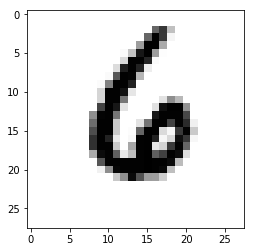

In [2]:
plt.imshow(X_train[431], cmap="Greys");

In [3]:
import tensorflow as tf
#s = tf.InteractiveSession()

In [4]:
max(y_train)

9

In [5]:
import numpy as np

In [6]:
X_train_orig = X_train
Y_train_orig = y_train
X_test_orig = X_test
Y_test_orig = y_test

# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten
X_test = X_test_flatten
# Convert training and test labels to one hot matrices
with tf.Session() as s:
    Y_train = s.run(tf.one_hot(Y_train_orig, depth=10,axis=0)) 
    Y_test = s.run(tf.one_hot(Y_test_orig, depth=10,axis=0))

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 50000
number of test examples = 10000
X_train shape: (784, 50000)
Y_train shape: (10, 50000)
X_test shape: (784, 10000)
Y_test shape: (10, 10000)


In [7]:
tf.set_random_seed(1)     
nW1 = 30
nW2 = 12
W1 = tf.get_variable("W1", [nW1,784], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#W1 = tf.get_variable("W1", [nW1,784], initializer = tf.zeros_initializer())
b1 = tf.get_variable("b1", [nW1,1], initializer = tf.zeros_initializer())
W2 = tf.get_variable("W2", [nW2,nW1], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#W2 = tf.get_variable("W2", [nW2,nW1], initializer = tf.zeros_initializer())
b2 = tf.get_variable("b2", [nW2,1], initializer = tf.zeros_initializer())
W3 = tf.get_variable("W3", [10,nW2], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#W3 = tf.get_variable("W3", [10,nW2], initializer = tf.zeros_initializer())
b3 = tf.get_variable("b3", [10,1], initializer = tf.zeros_initializer())
   

In [8]:
parameters = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}


In [9]:
X = tf.placeholder(dtype=tf.float32, shape=(784,None),name = "X")
Y = tf.placeholder(dtype=tf.float32, shape=(10,None),name = "Y")


In [10]:
Z1 = tf.matmul(W1, X) + b1 
A1 = tf.nn.relu(Z1)         
Z2 = tf.matmul(W2, A1) + b2 
A2 = tf.nn.relu(Z2)         
Z3 = (tf.matmul(W3, A2) + b3)


In [11]:
logits = tf.transpose(Z3)
labels = tf.transpose(Y)
    
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    

In [12]:
print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [13]:
learning_rate = 0.005
optimizer = tf.contrib.opt.NadamOptimizer(learning_rate = learning_rate).minimize(cost)

In [14]:
init = tf.global_variables_initializer()

number of minibatches: 50
Cost after epoch 0: 0.860588
Cost after epoch 1: 0.298667
Cost after epoch 2: 0.235898
Cost after epoch 3: 0.195351
Cost after epoch 4: 0.167286
Cost after epoch 5: 0.147420
Cost after epoch 6: 0.132343
Cost after epoch 7: 0.120565
Cost after epoch 8: 0.110571
Cost after epoch 9: 0.102628
Cost after epoch 10: 0.095416
Cost after epoch 11: 0.089693
Cost after epoch 12: 0.083303
Cost after epoch 13: 0.078442
Cost after epoch 14: 0.073457
Cost after epoch 15: 0.070840
Cost after epoch 16: 0.066174
Cost after epoch 17: 0.062728
Cost after epoch 18: 0.059022
Cost after epoch 19: 0.057027
Cost after epoch 20: 0.054081
Cost after epoch 21: 0.052179
Cost after epoch 22: 0.049194
Cost after epoch 23: 0.046632
Cost after epoch 24: 0.045630
Cost after epoch 25: 0.043062
Cost after epoch 26: 0.040677
Cost after epoch 27: 0.038764
Cost after epoch 28: 0.037188
Cost after epoch 29: 0.035072
Cost after epoch 30: 0.033950
Cost after epoch 31: 0.032950
Cost after epoch 32: 0.0

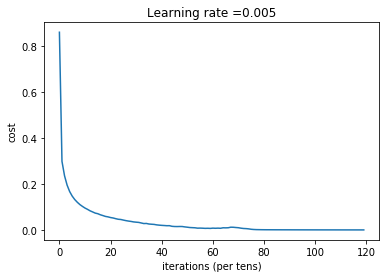

Parameters have been trained!
Train Accuracy: 1.0
Test Accuracy: 0.9615


In [15]:
num_epochs = 120
minibatch_size = 1000

tf.set_random_seed(1)              
seed = 3                           
(n_x, m) = X_train.shape           
n_y = Y_train.shape[0]             
costs = []                         
num_minibatches = int(m / minibatch_size)
with tf.Session() as s:
    s.run(init)
    print("number of minibatches: %i" % num_minibatches)
    for epoch in range(num_epochs):
                indices = np.arange(m)
                seed = seed + 1
                np.random.seed(seed)   
                tf.set_random_seed(seed)              
                np.random.shuffle(indices)    


                epoch_cost = 0.                       # Defines a cost related to an epoch


                for minibatch in range(num_minibatches):

                    # Select a minibatch
                    indxx = indices[(minibatch*minibatch_size):((minibatch+1)*minibatch_size)]
                    #print("Min index: %i, Max index %i"%(min(indxx),max(indxx)))
                    minibatch_X = X_train[:,indxx]
                    minibatch_Y = Y_train[:,indxx]

                    _ , minibatch_cost = s.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})

                    epoch_cost += minibatch_cost / num_minibatches



                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))

                costs.append(epoch_cost)

            # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()


    #parameters = s.run(parameters)
    print ("Parameters have been trained!")

            # Calculate the correct predictions
    correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

            # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

    print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
    print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))


In [21]:
X_train.shape

(784, 50000)

In [22]:
Y_train.shape

(10, 50000)

In [23]:
Y_train[1]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [36]:
Y_trainn = s.run(Y_train)

In [38]:
Y_trainn.shape

(10, 50000)

In [39]:
parameters

{'W1': array([[-0.06720018, -0.07504497,  0.04103547, ..., -0.08275126,
         -0.05040052,  0.0525768 ],
        [-0.0529878 , -0.01708265, -0.01616621, ..., -0.07227308,
         -0.05561358, -0.08293803],
        [-0.00988778,  0.08625709,  0.03805394, ...,  0.05612972,
         -0.02120328,  0.0418506 ],
        ..., 
        [ 0.07044296,  0.06624061, -0.0271799 , ..., -0.06787877,
         -0.00106919,  0.04162848],
        [-0.06980925, -0.01510062, -0.03495448, ..., -0.06967811,
         -0.06183787,  0.06442802],
        [-0.01783203, -0.07641722, -0.05176296, ...,  0.08393447,
         -0.05920894, -0.03230729]], dtype=float32),
 'W2': array([[ -3.96870412e-02,  -1.33576319e-01,  -4.98572558e-01,
           3.40133011e-01,   1.01581194e-01,   1.19886242e-01,
           1.53185293e-01,   1.62030216e-02,  -6.51375830e-01,
           1.01300567e-01,  -8.82598683e-02,   3.36597502e-01,
          -1.30174130e-01,  -2.87880659e-01,  -6.46692872e-01,
          -1.34355903e-01,  -3

In [24]:
s.run(cost,feed_dict={X: minibatch_X, Y: minibatch_Y})

2.3021202

In [13]:
np.max(X_train)

1.0

In [39]:
(s.run(logits, feed_dict={X: minibatch_X, Y: minibatch_Y}))[2323]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [25]:
parameters

{'W1': array([[-0.07631713, -0.08264387, -0.07369589, ..., -0.03552275,
          0.00845262,  0.02124172],
        [ 0.06525106,  0.04823687,  0.02396534, ...,  0.08348287,
          0.05830055, -0.07414245],
        [-0.03481081,  0.07262535, -0.00927146, ...,  0.0398467 ,
          0.06920759, -0.04578754],
        ..., 
        [ 0.03296611, -0.06692924,  0.02579892, ..., -0.0556815 ,
          0.03801493,  0.01178505],
        [ 0.06525917,  0.02668189,  0.01230507, ...,  0.07517792,
         -0.07230525, -0.03107211],
        [-0.01726518,  0.07918937, -0.01236165, ..., -0.05489742,
         -0.08120432, -0.03143509]], dtype=float32),
 'W2': array([[  5.15263714e-02,  -9.33143377e-01,   6.22057542e-02,
          -7.31075287e-01,   6.43202424e-01,  -1.41934771e-03,
          -1.18474297e-01,  -5.60593545e-01,  -5.76536715e-01,
          -6.17277563e-01,  -6.36844218e-01,  -5.68461120e-01,
          -1.57323912e-01,  -3.53225797e-01,  -2.86674827e-01,
          -2.55769879e-01,   3

In [49]:
s.run(cost, feed_dict={X: minibatch_X, Y: minibatch_Y})

2.3030374

In [26]:
tf.argmax(Z3), tf.argmax(Y)

(<tf.Tensor 'ArgMax_2:0' shape=(?,) dtype=int64>,
 <tf.Tensor 'ArgMax_3:0' shape=(?,) dtype=int64>)

(array([  4.88490000e+04,   1.13900000e+03,   4.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   3.00000000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 9 Patch objects>)

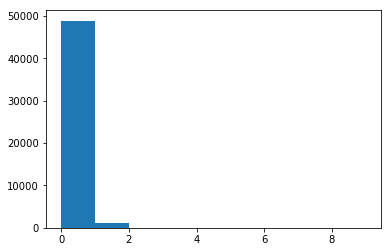

In [34]:
plt.hist(s.run(tf.argmax(Z3.eval({X: X_train, Y: Y_train}))),9)

(array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([ 0.5       ,  0.61111111,  0.72222222,  0.83333333,  0.94444444,
         1.05555556,  1.16666667,  1.27777778,  1.38888889,  1.5       ]),
 <a list of 9 Patch objects>)

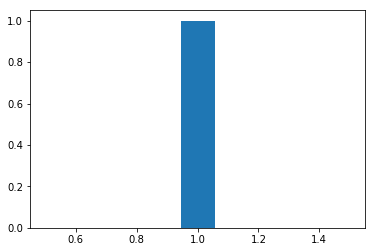

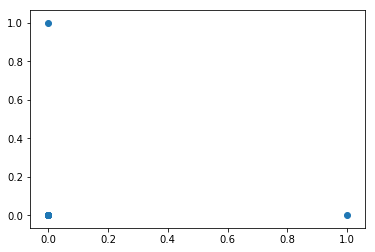

In [25]:
plt.scatter(Y_train[:,122],Y_train[:,123])

In [32]:
parameters

{'W1': array([[-0.07631713, -0.08264387, -0.07369589, ..., -0.03552275,
          0.00845262,  0.02124172],
        [ 0.06525106,  0.04823687,  0.02396534, ...,  0.08348287,
          0.05830055, -0.07414245],
        [-0.03481081,  0.07262535, -0.00927146, ...,  0.0398467 ,
          0.06920759, -0.04578754],
        ..., 
        [ 0.03296611, -0.06692924,  0.02579892, ..., -0.0556815 ,
          0.03801493,  0.01178505],
        [ 0.06525917,  0.02668189,  0.01230507, ...,  0.07517792,
         -0.07230525, -0.03107211],
        [-0.01726518,  0.07918937, -0.01236165, ..., -0.05489742,
         -0.08120432, -0.03143509]], dtype=float32),
 'W2': array([[  5.13917468e-02,  -9.32943106e-01,   6.20714277e-02,
          -7.30879068e-01,   6.43017650e-01,  -1.39815896e-03,
          -1.18318863e-01,  -5.60415864e-01,  -5.76358318e-01,
          -6.17075503e-01,  -6.36679292e-01,  -5.68289042e-01,
          -1.57150805e-01,  -3.53036672e-01,  -2.86553234e-01,
          -2.55567938e-01,   3